In [1]:
from __future__ import print_function, absolute_import, division, unicode_literals, with_statement
import numpy as np
from cleanlab.noise_generation import generate_noise_matrix_from_trace, noise_matrix_is_valid
from cleanlab import polyplex

# Plotting functions and imports
% matplotlib inline
from matplotlib import pyplot as plt
# For pretty figure plotting
# import seaborn as sns  # Uncomment if you have seaborn installed.
# sns.set(style='white', font_scale=3) # Uncomment if you have seaborn installed.
# Important! Make fonts Type I fonts (necessary for publishing in ICML and other conference)
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from distutils.spawn import find_executable
plt.rc('text',usetex=(find_executable('latex') is not None)) # Use latex if installed

colors = [plt.cm.tab10(i) for i in range(plt.cm.tab10.N)] + [plt.cm.Set2(i) for i in range(plt.cm.Set2.N)]

## Drawing Polyplices

### The polyplex is a geometric solution for the domain of $trace (P_{s,y})$ given $trace (P_{s \vert y})$ for some the latent prior $p(y)$. Like the simplex, the polyplex describes the domain of a probabilistic quantity, but unlike the simplex, the coordinates need not sum to one and the shape is instead defined by a convex polyhedron, hence the name.

### For each $p(y)$, we draw three polyplices: (1) with depicted samples, (2) with lines showing where the polyplex changes shape, and (3) only the polyplex. 

### To see many examples of polyplices, [check out this gif](https://giphy.com/gifs/machine-learning-polyplex-weak-supervision-SIugN5ZMFUEOERvSix/fullscreen). 

### When $p(y)$ is uniform, the polyplex is a line and $trace (P_{s,y}) = trace(P_{s \vert y})$. This is intuitive because $\forall k = K, P_{s,y = k} = P_{s \vert y = k} \cdot p(y = k)$. The vertical and horizontal lines indicate where the linear edges of the polyplex change slope. Notice that slopes of the linear edges are precisely the values of $p(y)$, in ascending order. In general, polyplices are unaffected by permutations in $p(y)$, so the polyplex would have the same shape if $p(y)$ was in a different order. The polyplex, and therefor the domain of $trace (P_{s,y})$ is fully specified by $p(y)$. The rightmost figure depicts a prior $p(y)$ for 9 classes. The red 'v's and 'n's depict the locations of uniformly random sample matrices $P_{s \vert y}$ drawn from the polyplex for different values of $trace (P_{s \vert y})$.

In [2]:
def draw_polyplex(py, intersecting_lines=False):
    py = [round(p, 3) for p in py]
    plt.figure(figsize=(10, 7))
    K = len(py)
    x, y_min, y_max = polyplex.joint_bounds(py)
    min_slopes = [round(polyplex.slope_intercept(*list(zip(x, y_min))[i-1:i+1])[0], 4) for i in range(1, len(x))]
    max_slopes = [round(polyplex.slope_intercept(*list(zip(x, y_max))[i-1:i+1])[0], 4) for i in range(1, len(x))]
    _ = plt.plot(x[:2], y_min[:2], label='min', color='black', linestyle='--')    
    _ = plt.plot(x[:2], y_max[:2], label='max', color='black', linestyle='--')
    _ = plt.plot(x[1:], y_min[1:], label='min', color='black')    
    _ = plt.plot(x[1:], y_max[1:], label='max', color='black')
    _ = plt.vlines(1, y_min[1], y_max[1], color='black')
    # Annotate with slopes
    for i in range(len(x)-1):
        _ = plt.text(x[i]+.5, (y_min[i]+y_min[i+1])/2, str(min_slopes[i]), fontsize=30)
        _ = plt.text(x[i]+.5, (y_max[i]+y_max[i+1])/2, str(max_slopes[i]), fontsize=30)
    ax = plt.gca()
    ax.fill_between(x[1:], y_min[1:], y_max[1:], color='gray', alpha=0.25)
    if intersecting_lines:
        for i, trace in enumerate(range(K+1)):
            _ = plt.vlines(trace, 0, 1, color=colors[i], linestyle=':')
            _ = plt.hlines(polyplex.joint_min_max(trace, py),0,K, color=colors[i], linestyle='--')
#     _ = plt.suptitle('Polyplex of joint distribution $P_{s,y}$')
    _ = plt.title('$p(y) =$' + str(py), fontsize = 25)
    _ = plt.xlabel(r'$trace(P_{s|y})$', fontsize = 30) 
    _ = plt.ylabel(r'$trace(P_{s,y})$', fontsize = 30)
    _ = plt.xticks([0, K//2, K] if K%2==0 else [0, K//2, K//2 + 1,K]) 
    ax.tick_params(labelsize=30)
    return ax

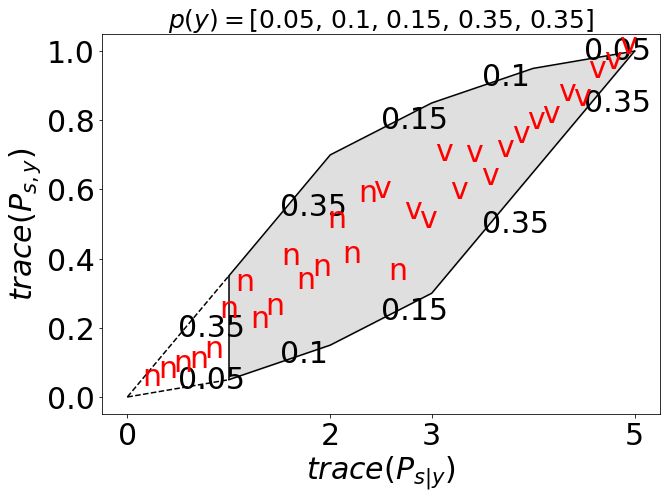

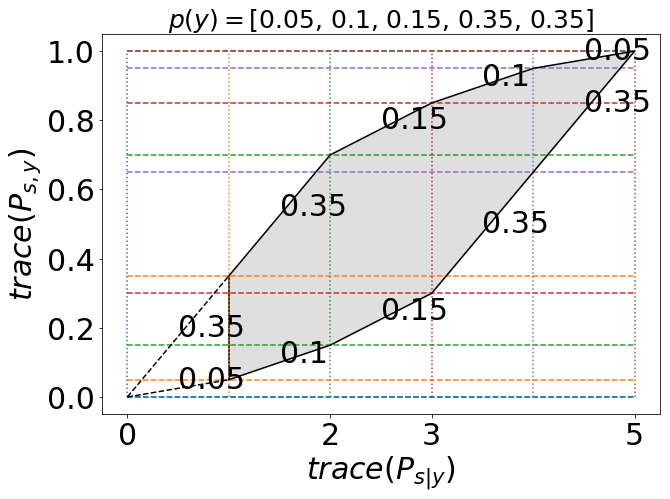

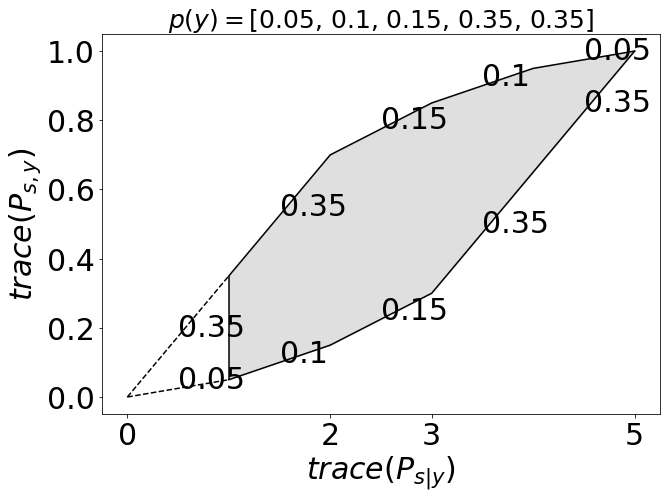

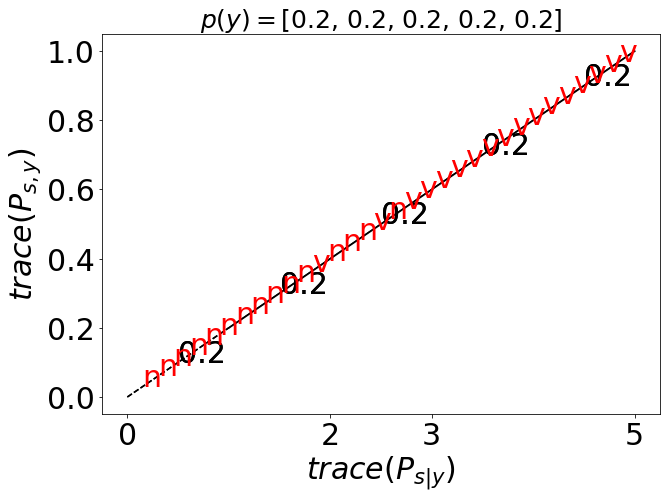

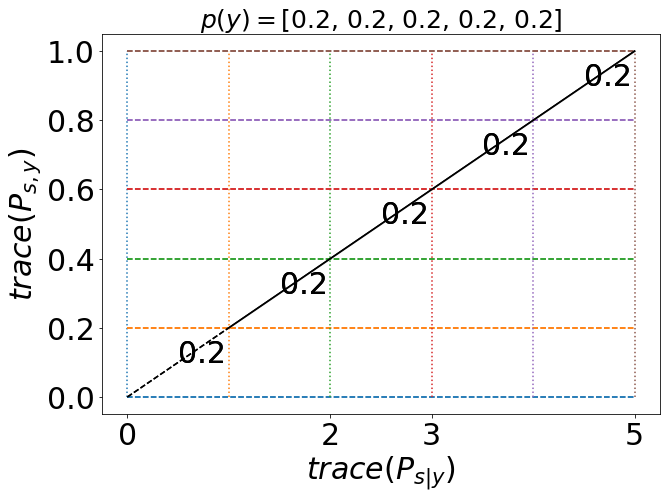

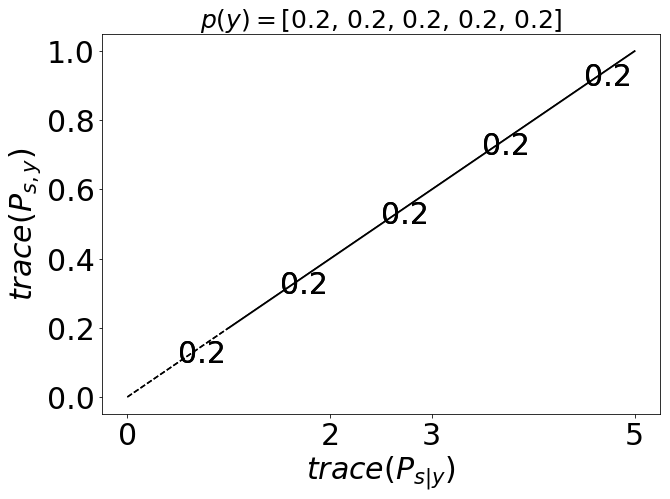

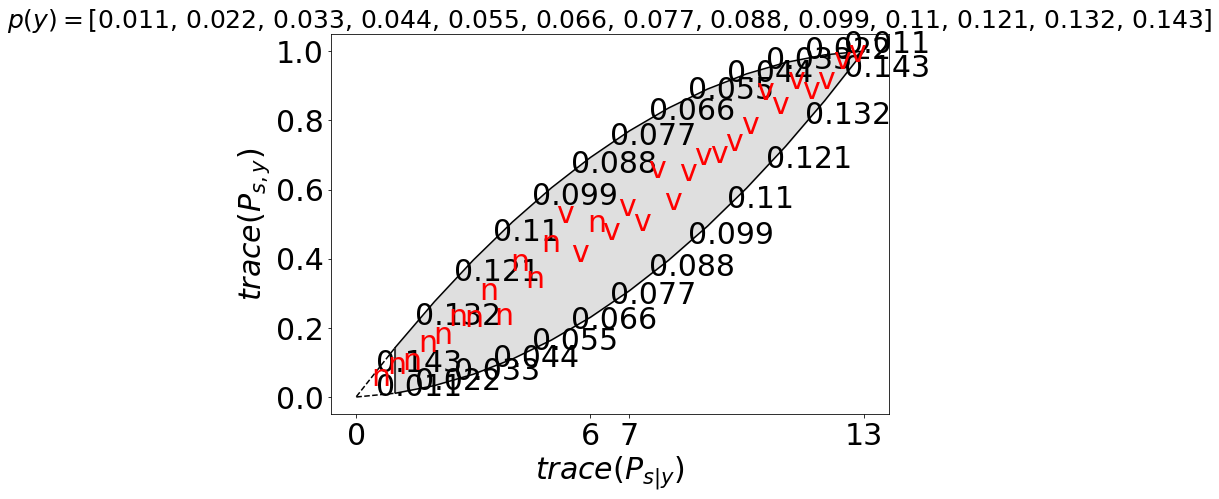

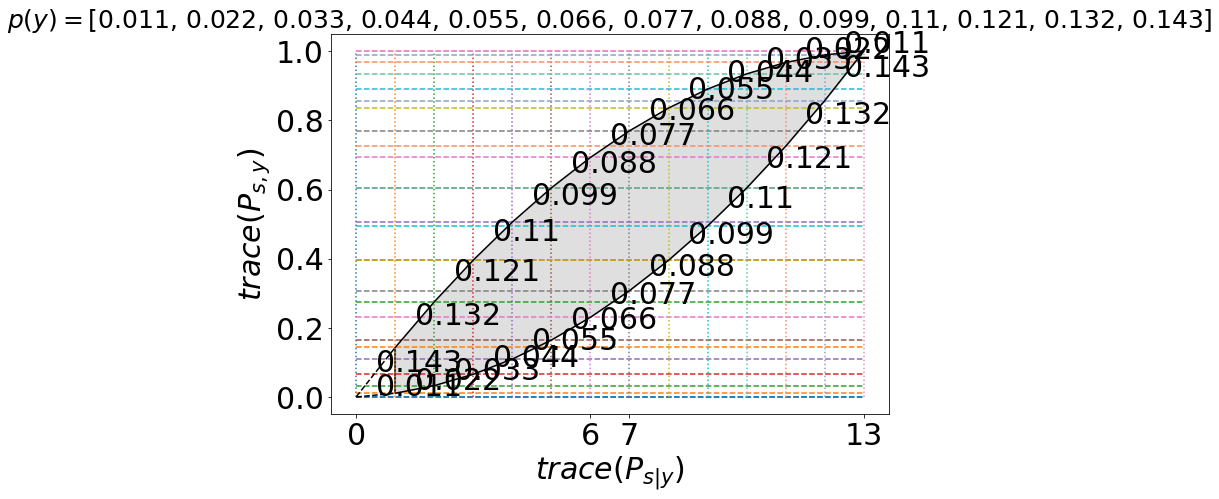

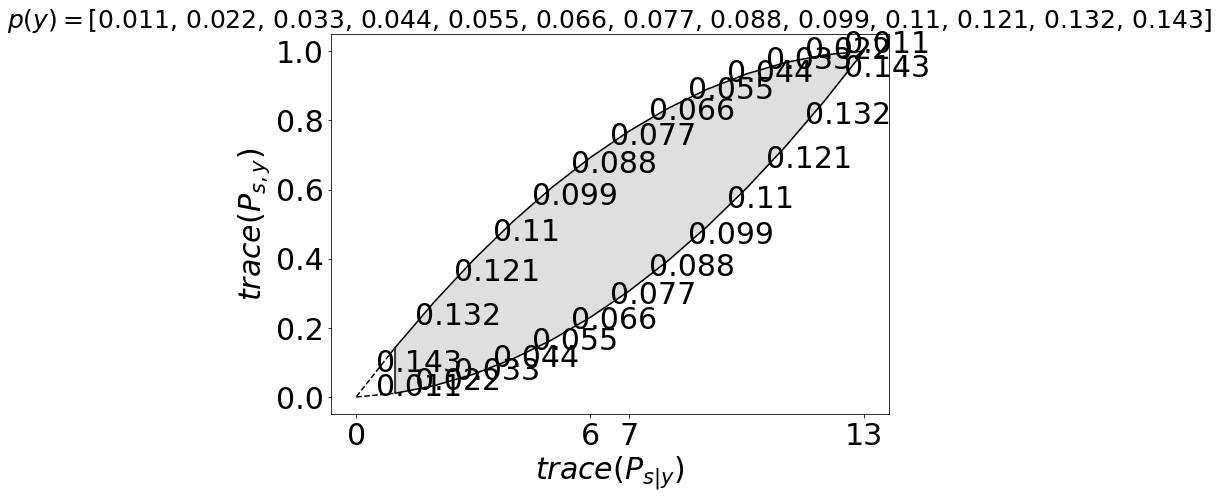

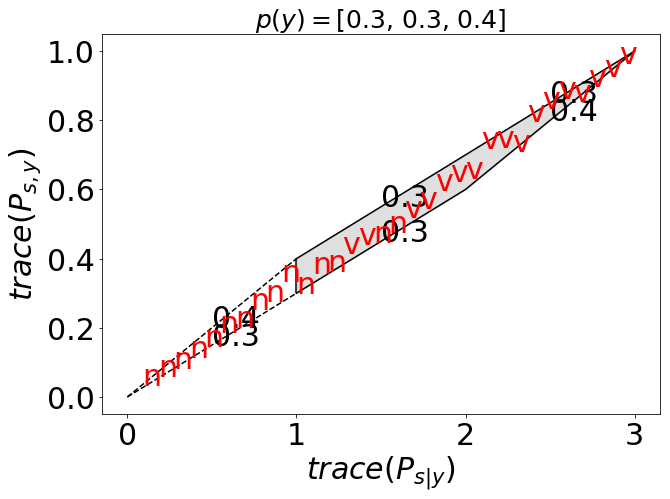

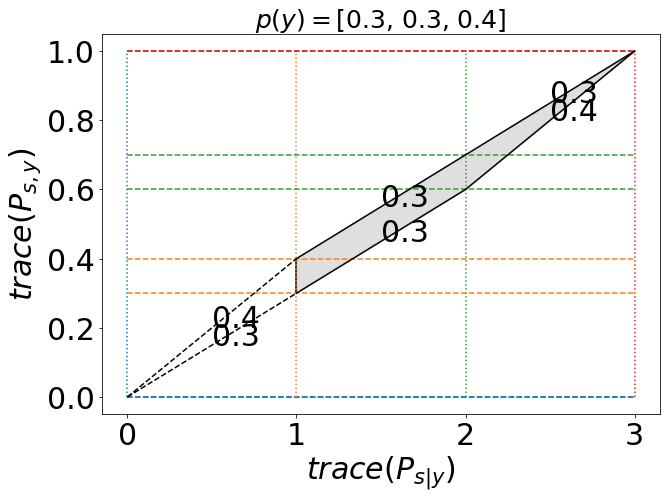

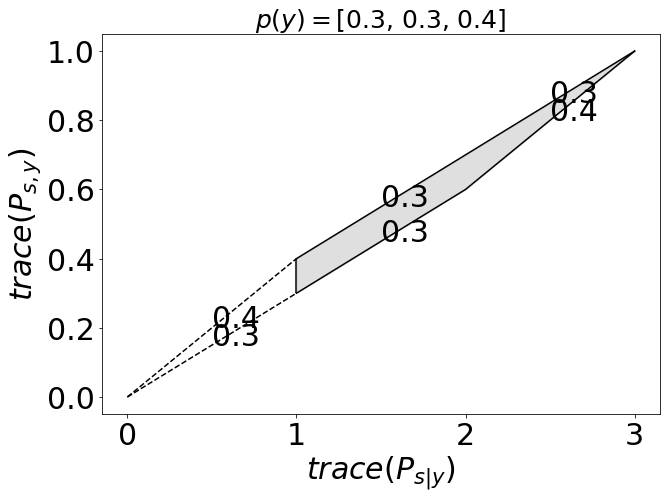

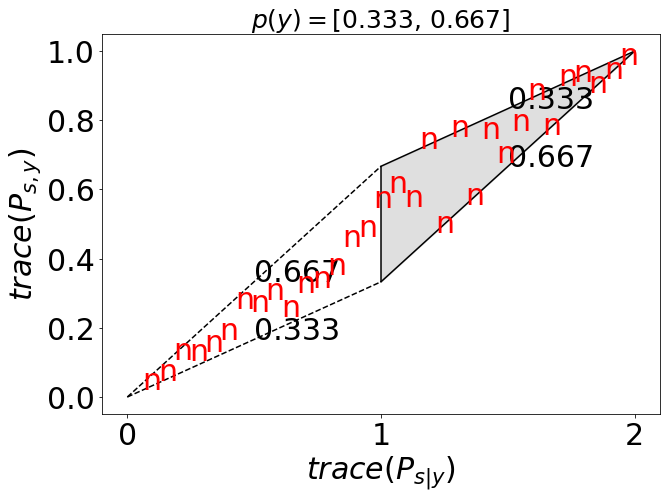

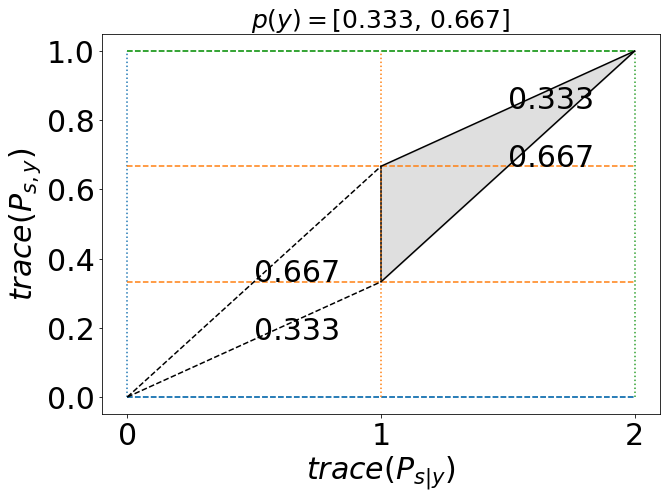

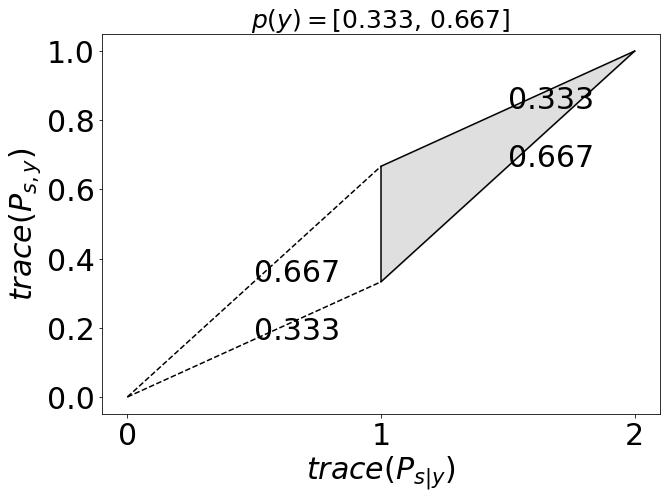

In [3]:
savefig = False
number_of_polyplices_to_display = 5

pys = [[.01,.39,.6], [0.2]*5, [.1,.3,.6], [.3,.3,.4],[.2,.6,.2],[.1,.2,.7],[.1,.15,.15,.6],[.1,.1,.2,.6],[1./3,1./3,1./3], [.02,.05,.08,.15,.15,.25,.3], [.05,.1,.15,.35,0.35] ]
pys = pys + [np.arange(1,k+1, dtype=float) / sum(range(k+1)) for k in range(2,14)]
for py in np.random.choice(pys, number_of_polyplices_to_display):
    ax = draw_polyplex(py)
    
    K=len(py)
    for trace in np.arange(K / 33., K , K / 33.):
#         py = np.arange(1,K+1, dtype=float) / sum(range(K+1))
        nm = generate_noise_matrix_from_trace(K, trace, valid_noise_matrix=False, py=py)
        valid = noise_matrix_is_valid(nm, py)
        joint_trace = np.trace(nm*py)
#         print('ps is', (nm*py).sum(axis=1))
        _ = ax.text(trace, joint_trace, s='v' if valid else 'n', color='red', size=30)
    
    
#     for z in np.arange(100):
# #         py = np.arange(1,K+1, dtype=float) / sum(range(K+1))
#         nm = generate_noise_matrix_from_trace(K, nm_avg_trace, valid_noise_matrix=True, py=py)
#         joint_trace = np.trace(nm*py)
# #         print('ps is', (nm*py).sum(axis=1))
#         _ = ax.plot([nm_avg_trace*K], [joint_trace], marker='o', color='red')
    
    if savefig:
        plt.savefig('figs/polyplices/polyplex_'+str(py)+'_withvs.pdf', pad_inches=0.0, bbox_inches='tight')
        
        
    _ = draw_polyplex(py, intersecting_lines=True)
    if savefig:
        plt.savefig('figs/polyplices/polyplex_'+str(py)+'_withlines.pdf', pad_inches=0.0, bbox_inches='tight')
    
    _ = draw_polyplex(py, intersecting_lines=False)
    if savefig:
        plt.savefig('figs/polyplices/polyplex_'+str(py)+'_plain.pdf', pad_inches=0.0, bbox_inches='tight')    